# Further Data Exploration

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Aims-of-the-Capstone-Project:" data-toc-modified-id="The-Aims-of-the-Capstone-Project:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Aims of the Capstone Project:</a></span></li><li><span><a href="#Data-Dictionary:" data-toc-modified-id="Data-Dictionary:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Dictionary:</a></span></li><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Change-in-Number-of-Open-Channels:" data-toc-modified-id="Change-in-Number-of-Open-Channels:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Change in Number of Open Channels:</a></span></li><li><span><a href="#Length-of-Time-the-Number-of-Open-Channel-Stays-the-Same:" data-toc-modified-id="Length-of-Time-the-Number-of-Open-Channel-Stays-the-Same:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Length of Time the Number of Open Channel Stays the Same:</a></span></li><li><span><a href="#Plot-Effect-of-Exponential-Weighted-Mean" data-toc-modified-id="Plot-Effect-of-Exponential-Weighted-Mean-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot Effect of Exponential Weighted Mean</a></span><ul class="toc-item"><li><span><a href="#Plots-for-Signal-with-Drift:" data-toc-modified-id="Plots-for-Signal-with-Drift:-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plots for Signal with Drift:</a></span></li><li><span><a href="#Plots-for-Signal-without-Drift:" data-toc-modified-id="Plots-for-Signal-without-Drift:-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plots for Signal without Drift:</a></span></li></ul></li><li><span><a href="#Plot-the-Gradients-of-the-Signal:" data-toc-modified-id="Plot-the-Gradients-of-the-Signal:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Gradients of the Signal:</a></span><ul class="toc-item"><li><span><a href="#Plots-for-Signal-with-Drift:" data-toc-modified-id="Plots-for-Signal-with-Drift:-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Plots for Signal with Drift:</a></span></li><li><span><a href="#Plots-for-Signal-without-Drift:" data-toc-modified-id="Plots-for-Signal-without-Drift:-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots for Signal without Drift:</a></span></li></ul></li><li><span><a href="#Corralation-Matrix" data-toc-modified-id="Corralation-Matrix-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Corralation Matrix</a></span><ul class="toc-item"><li><span><a href="#Matrix-for-Signal-with-Drift:" data-toc-modified-id="Matrix-for-Signal-with-Drift:-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Matrix for Signal with Drift:</a></span></li><li><span><a href="#Matrix-for-Signal-without-Drift:" data-toc-modified-id="Matrix-for-Signal-without-Drift:-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Matrix for Signal without Drift:</a></span></li></ul></li></ul></div>

### The Aims of the Capstone Project:

- To predict the number of ion channels open based on the signal

The signal is from a device which mesures the current flow from the ion channels oppening.

### Data Dictionary:

- "time" : The time from the start.
- "signal" : A small electrical current from the ion channels allowing charged ions to pass.
- "open_channels" : The number of open ion channels.

NB: The time data is from discrete batches of 50 seconds long 10 kHz samples (500,000 rows per batch).

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import scipy.fftpack
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Import Data:

In [2]:
# Filepaths / names:
train_file = '../Data/train'
test_file = '../Data/test'
clean_train_file = '../Data/train_clean'
clean_test_file = '../Data/test_clean'

In [3]:
train_df = pd.read_csv(f'{train_file}_processed.csv')

test_df = pd.read_csv(f'{test_file}_processed.csv')

train_clean_df = pd.read_csv(f'{clean_train_file}_processed.csv')

test_clean_df = pd.read_csv(f'{clean_test_file}_processed.csv')

train_eda = pd.read_csv(f'{train_file}_eda.csv')

###  Change in Number of Open Channels:

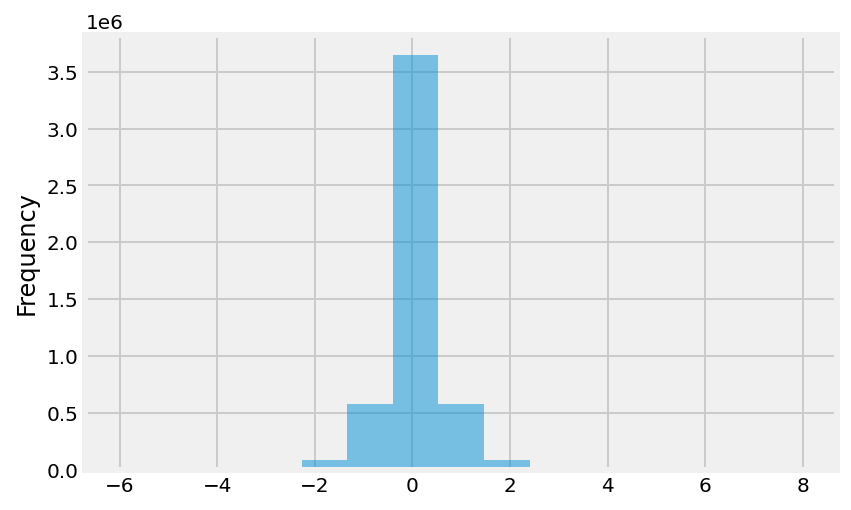

In [4]:
ax = train_eda['diff_open_channels'].plot.hist(bins=15, alpha=0.5)
plt.show()

### Length of Time the Number of Open Channel Stays the Same:

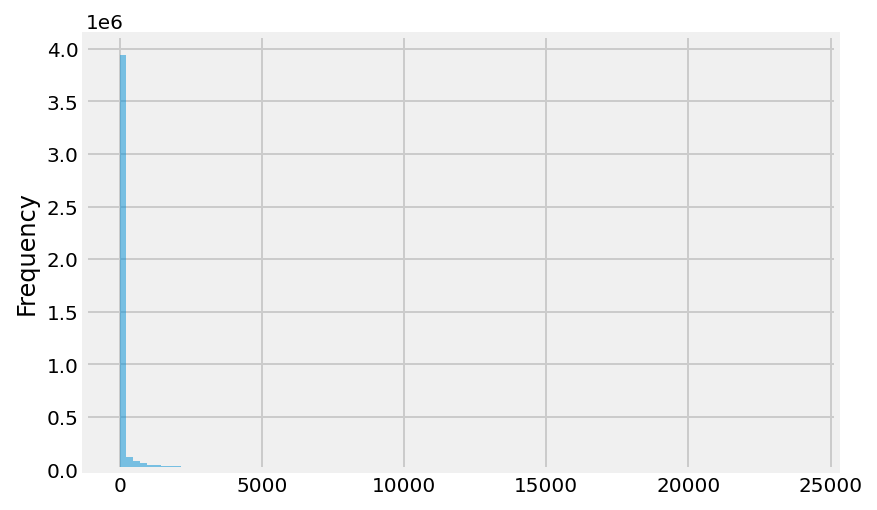

In [5]:
ax = train_eda['len_same_open_channels'].plot.hist(bins=100, alpha=0.5)
plt.show()

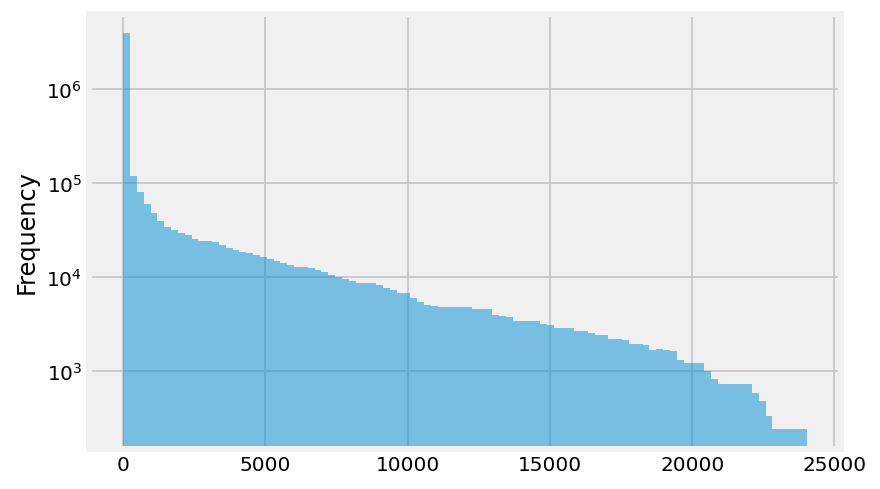

In [6]:
ax = train_eda['len_same_open_channels'].plot.hist(bins=100, alpha=0.5)
ax.set_yscale(value='log')
plt.show()

### Plot Effect of Exponential Weighted Mean

#### Plots for Signal with Drift:

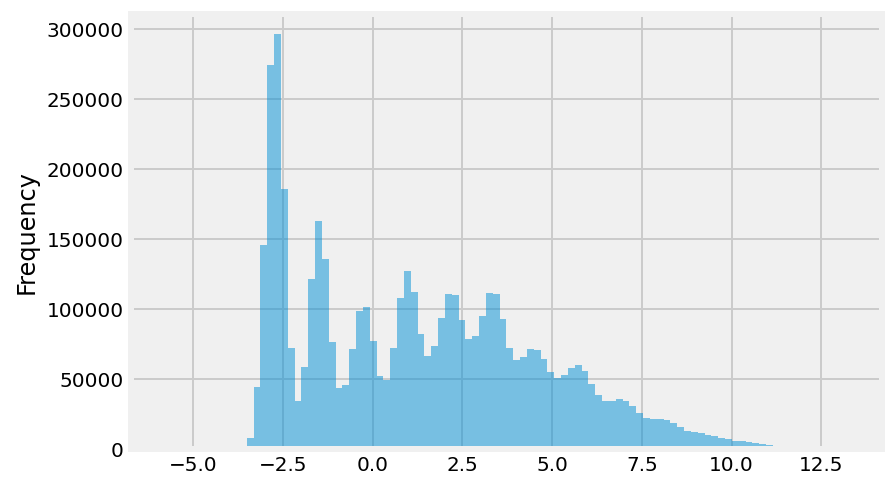

In [7]:
ax = train_df['signal'].plot.hist(bins=100, alpha=0.5)
plt.show()

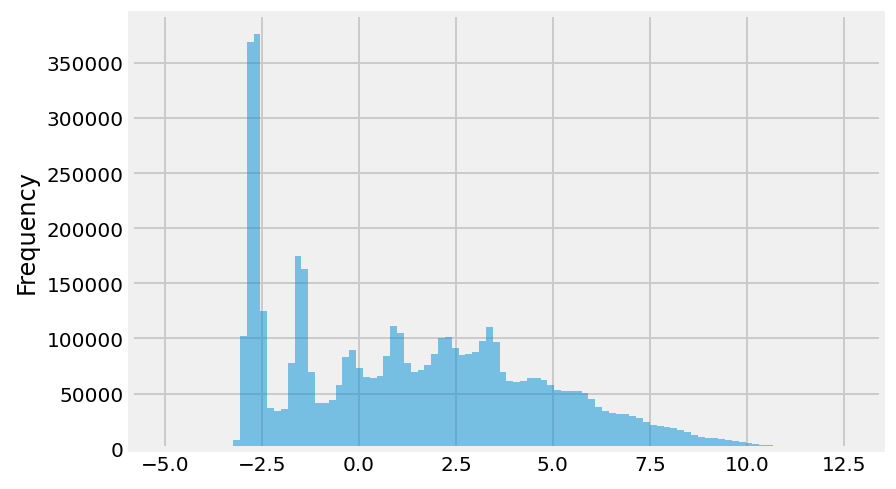

In [8]:
ax = train_df['ewm_signal'].plot.hist(bins=100, alpha=0.5)
plt.show()

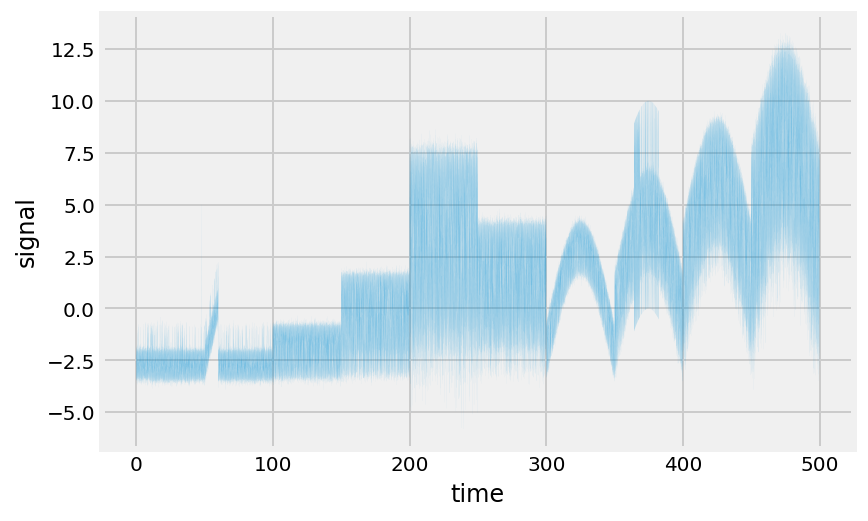

In [9]:
sns.lineplot(x="time", y="signal",data=train_df,linewidth=0.01)
plt.show()

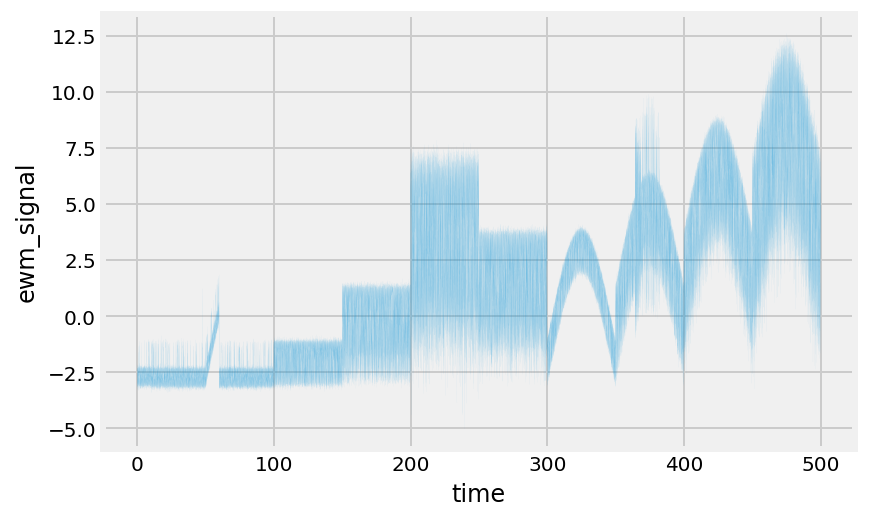

In [10]:
sns.lineplot(x="time", y="ewm_signal",data=train_df,linewidth=0.01)
plt.show()

#### Plots for Signal without Drift:

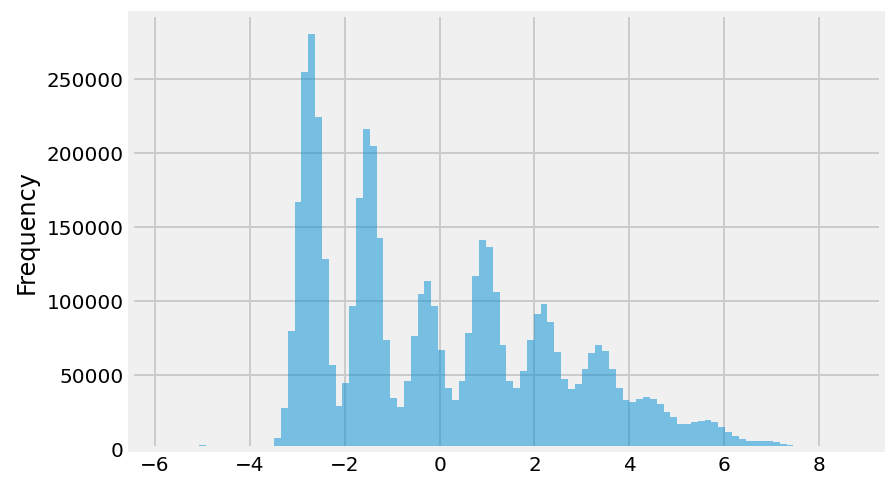

In [11]:
ax = train_clean_df['signal'].plot.hist(bins=100, alpha=0.5)
plt.show()

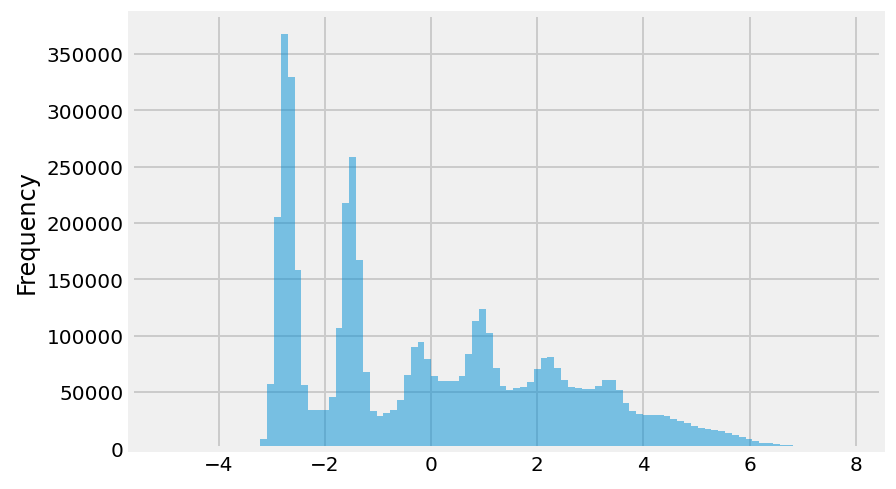

In [12]:
ax = train_clean_df['ewm_signal'].plot.hist(bins=100, alpha=0.5)
plt.show()

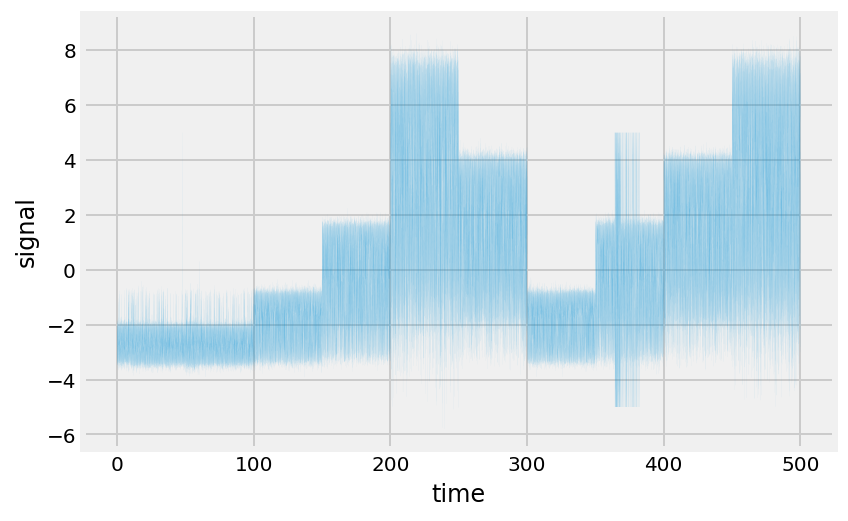

In [13]:
sns.lineplot(x="time", y="signal",data=train_clean_df,linewidth=0.01)
plt.show()

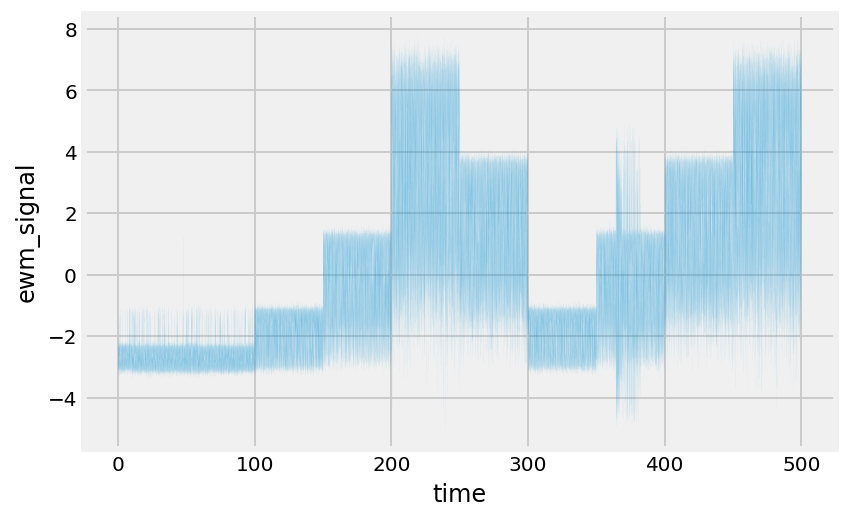

In [14]:
sns.lineplot(x="time", y="ewm_signal",data=train_clean_df,linewidth=0.01)
plt.show()

### Plot the Gradients of the Signal:

#### Plots for Signal with Drift:

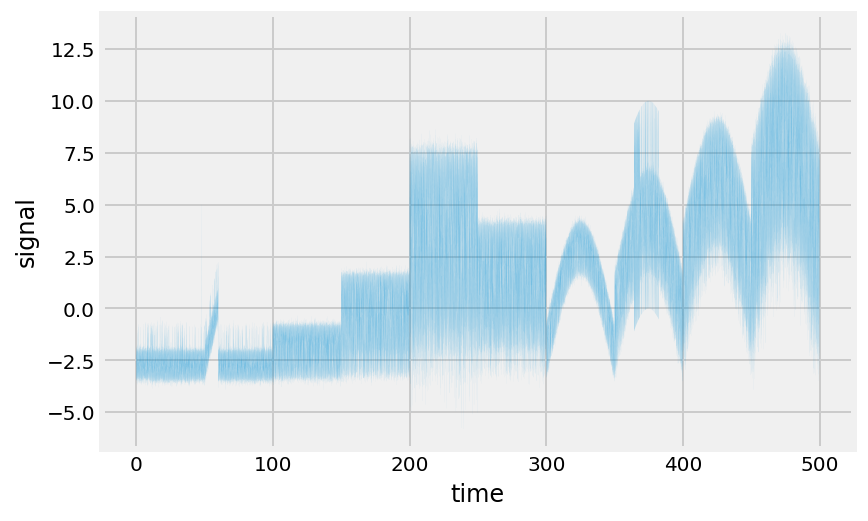

In [15]:
sns.lineplot(x="time", y="signal",data=train_df,linewidth=0.01)
plt.show()

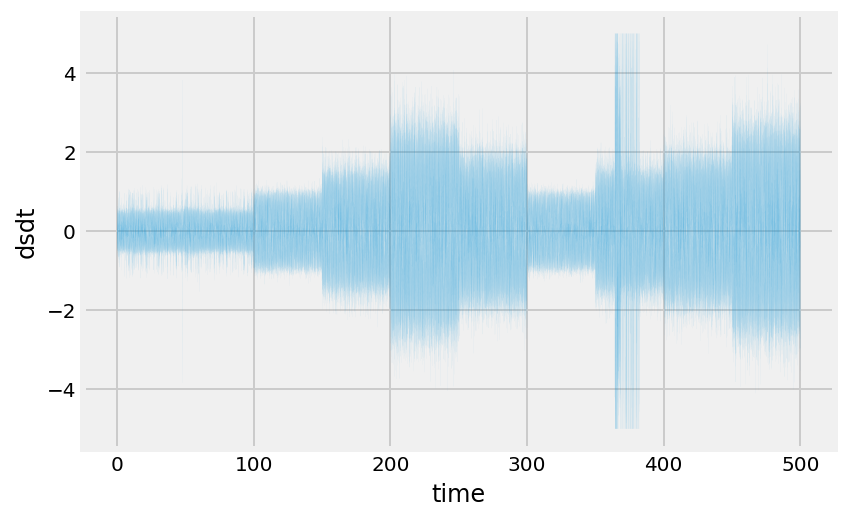

In [16]:
sns.lineplot(x="time", y="dsdt",data=train_df,linewidth=0.01)
plt.show()

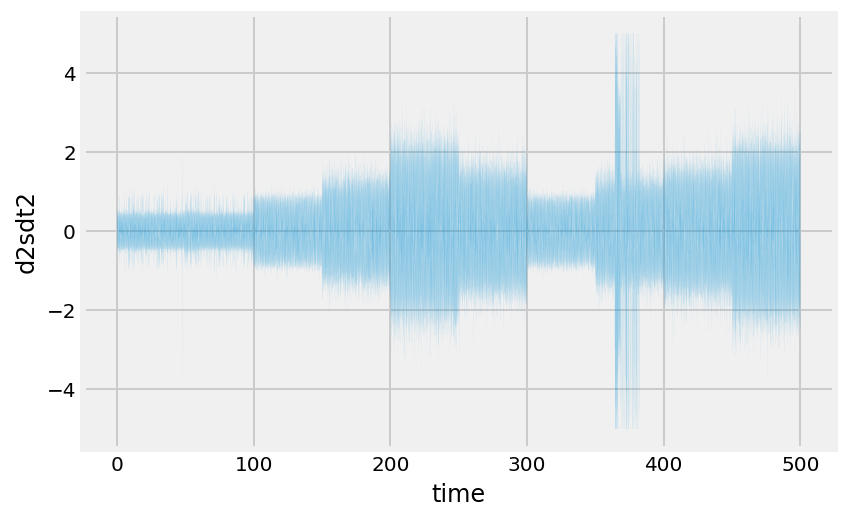

In [17]:
sns.lineplot(x="time", y="d2sdt2",data=train_df,linewidth=0.01)
plt.show()

#### Plots for Signal without Drift:

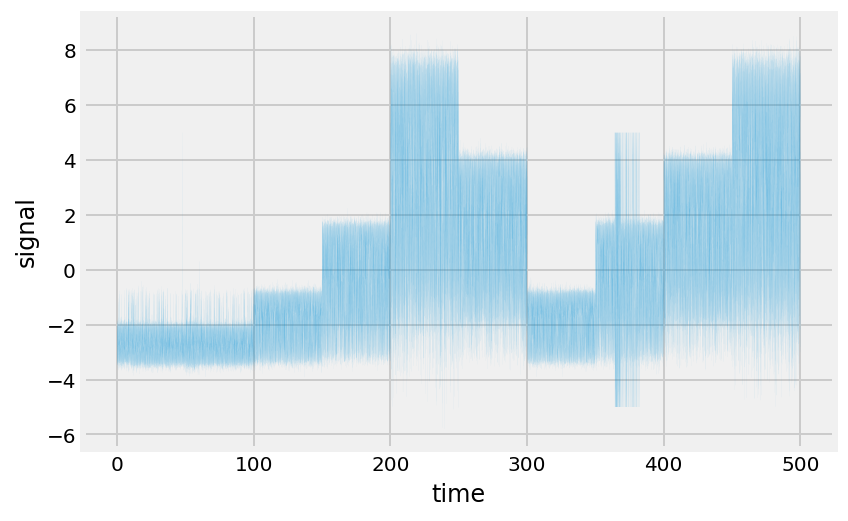

In [18]:
sns.lineplot(x="time", y="signal",data=train_clean_df,linewidth=0.01)
plt.show()

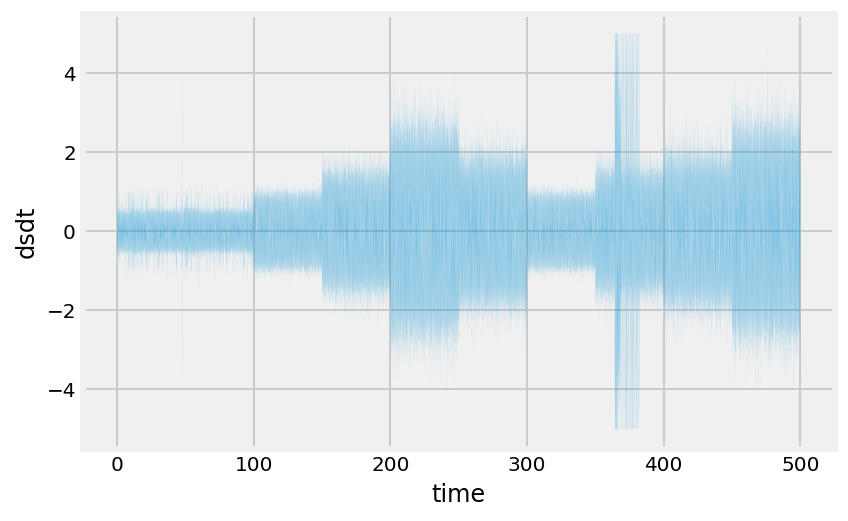

In [19]:
sns.lineplot(x="time", y="dsdt",data=train_clean_df,linewidth=0.01)
plt.show()

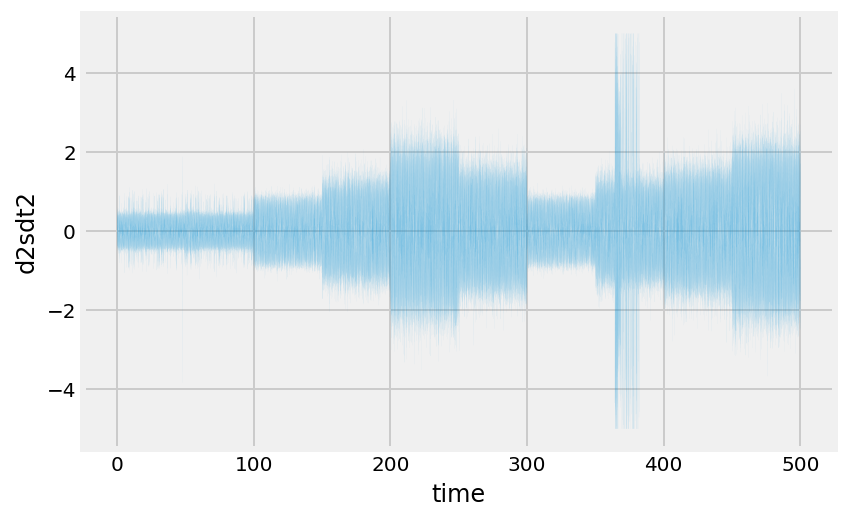

In [20]:
sns.lineplot(x="time", y="d2sdt2",data=train_clean_df,linewidth=0.01)
plt.show()

### Corralation Matrix

#### Matrix for Signal with Drift:

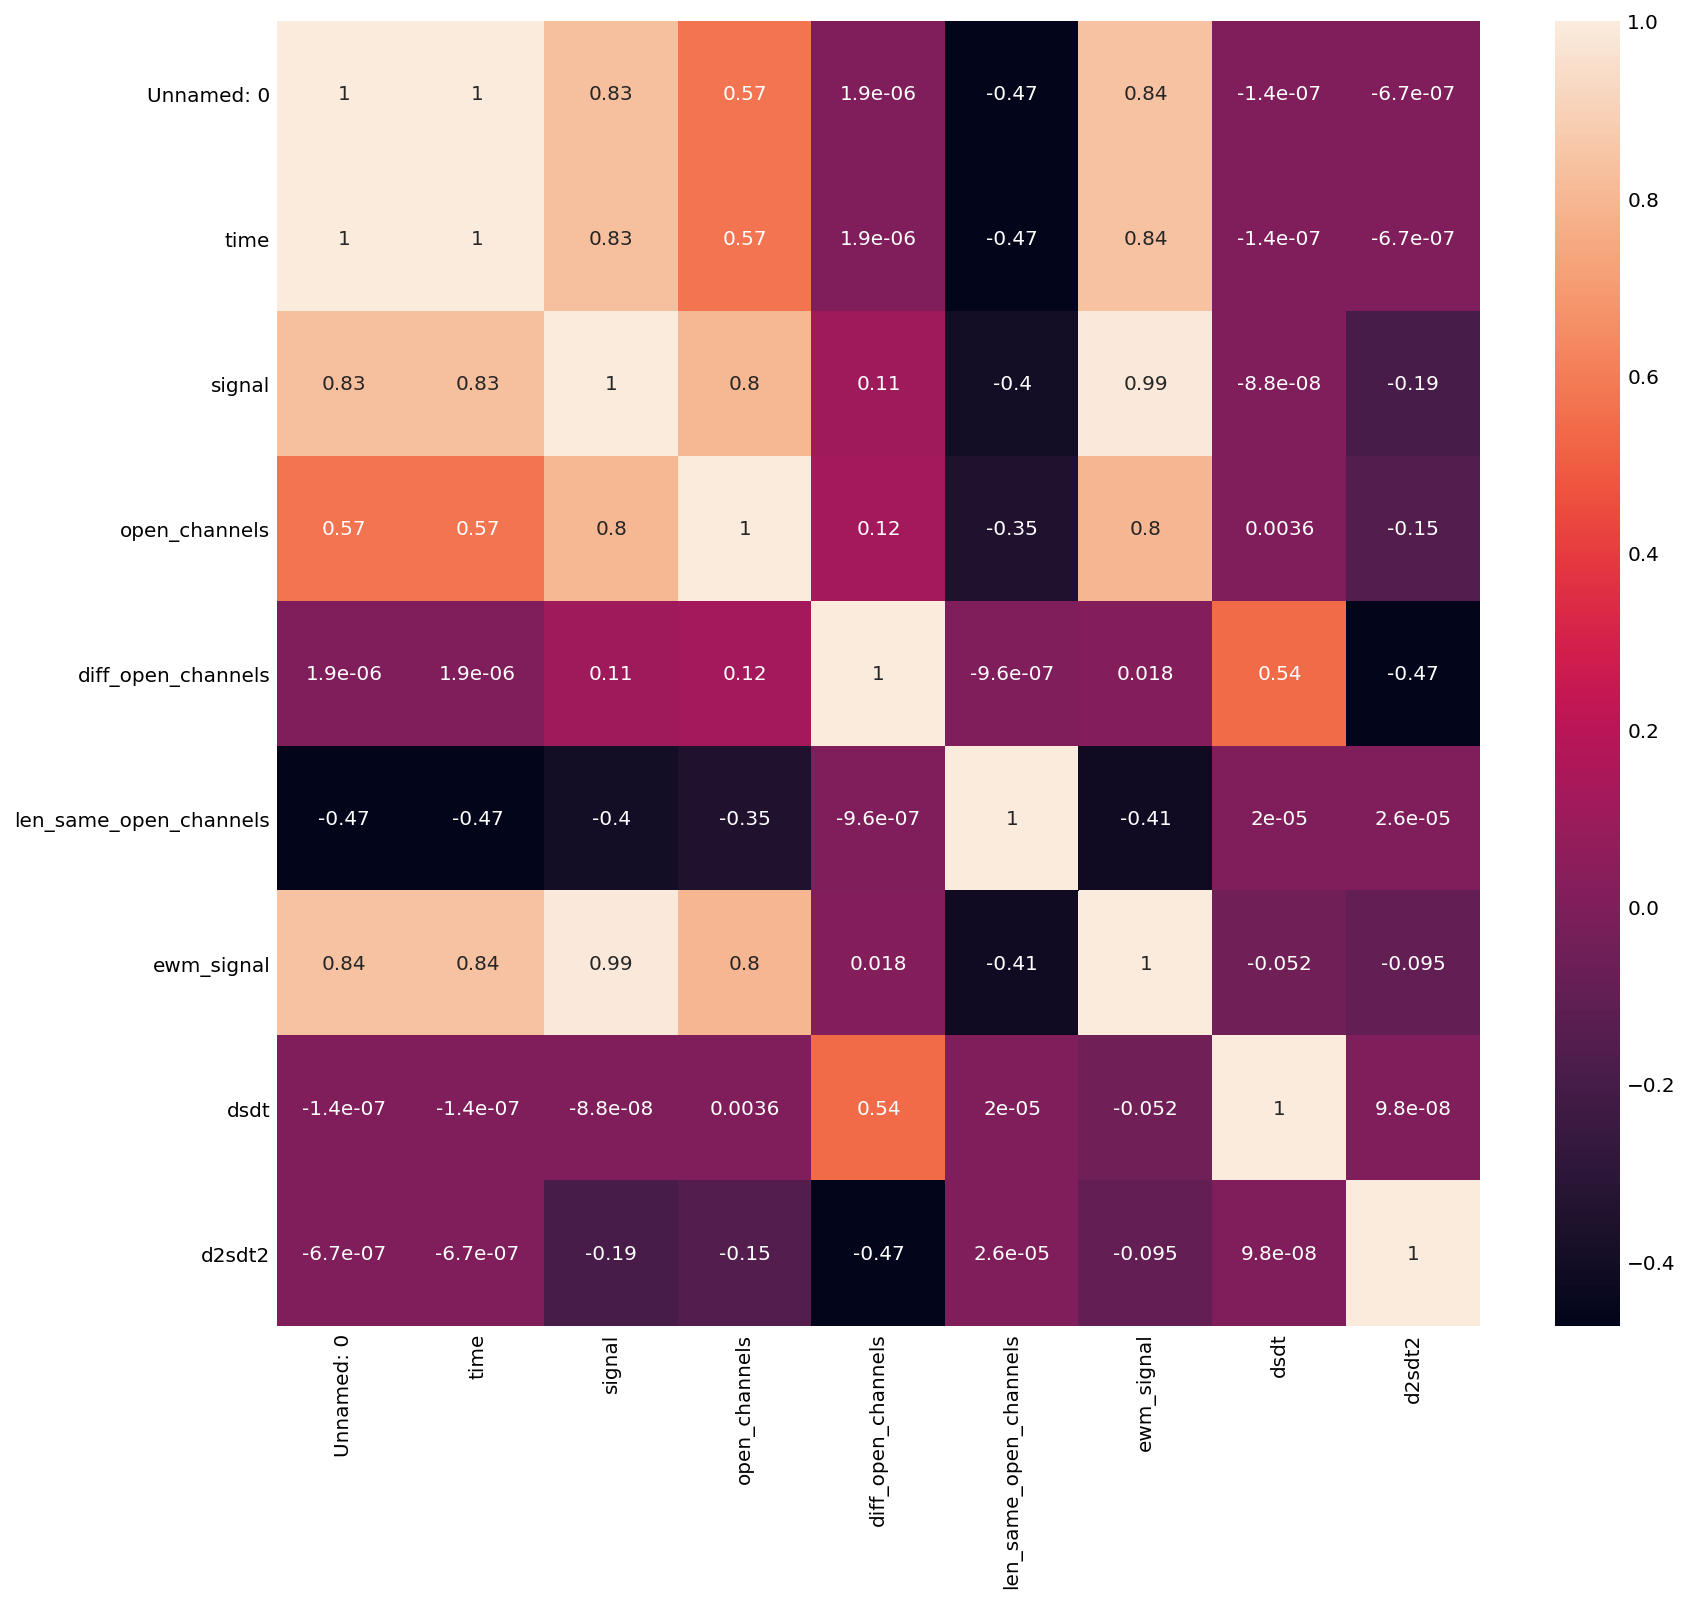

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

#### Matrix for Signal without Drift:

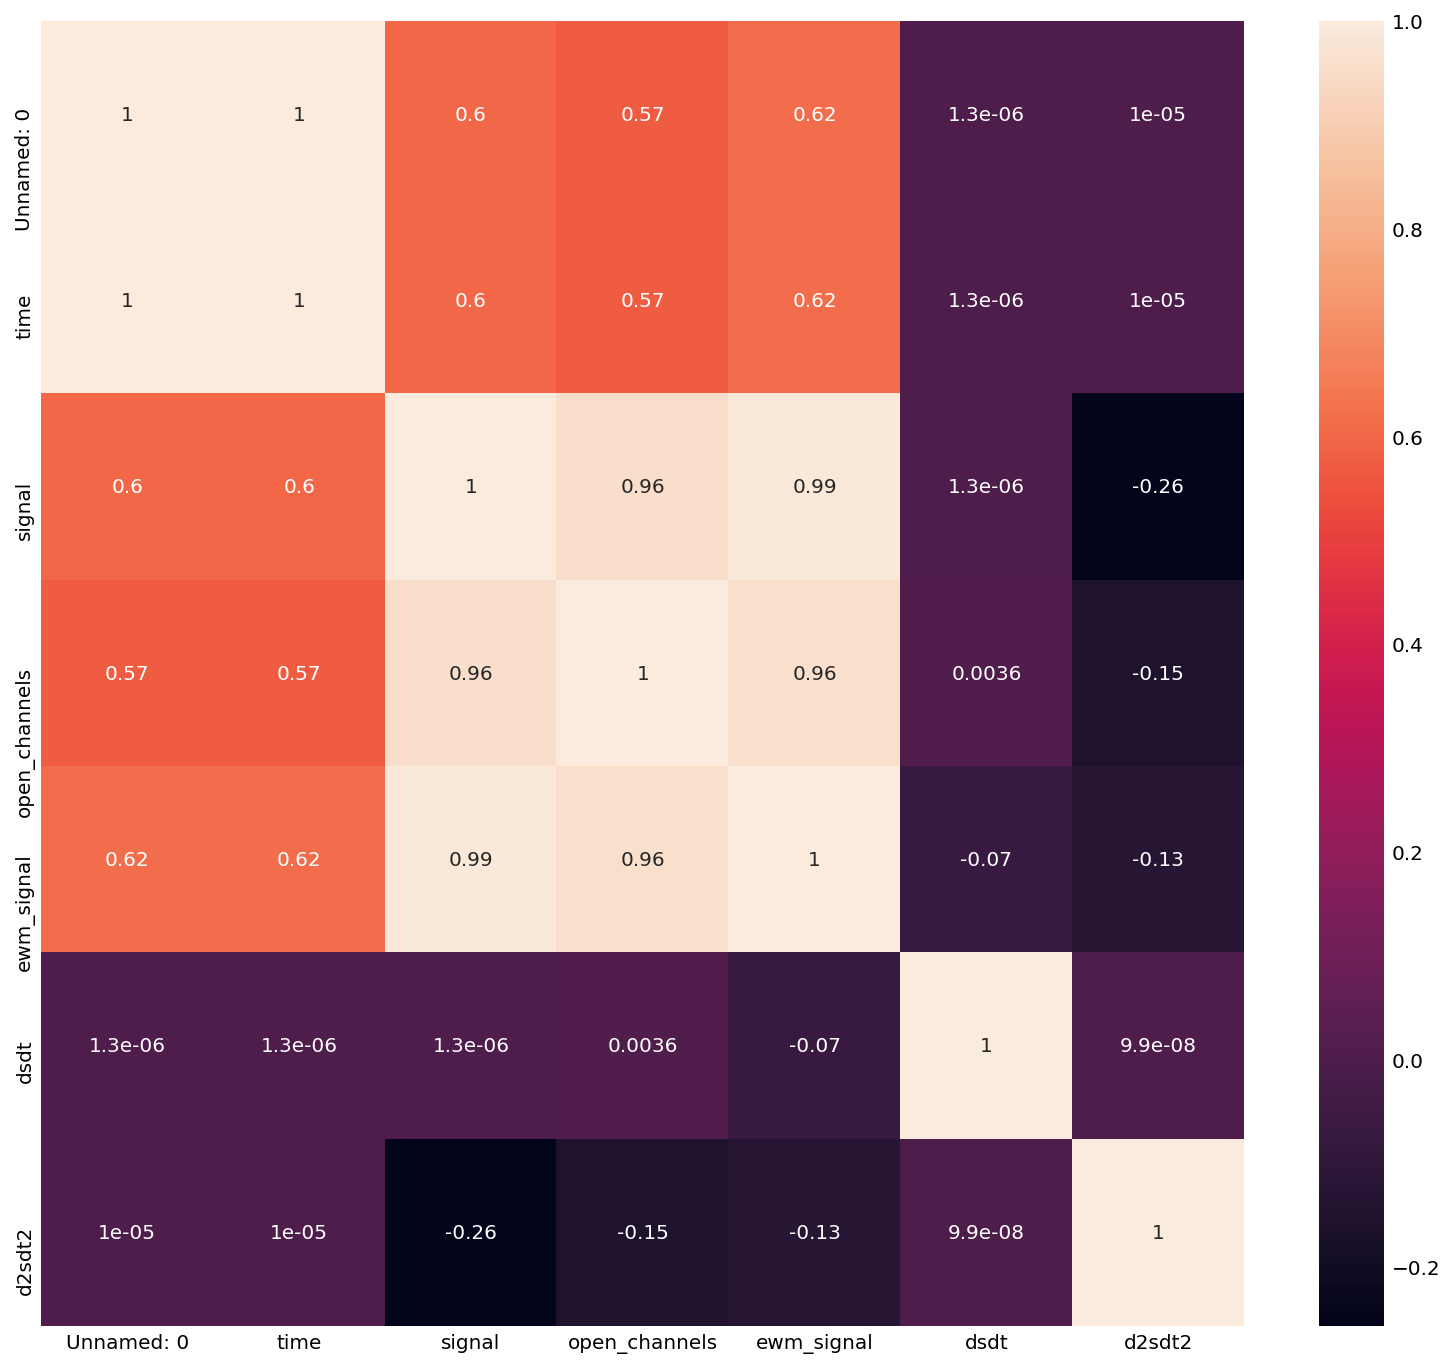

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_clean_df.corr(), annot=True)
plt.show()